# Align Tools

Here, we introduce the toolkit for image alignment using the 2D cross-correlation technique. This module can be used for any two-dimensional array including the FISS data. Here we show how to use this module with the FISS data.

First, prepare the raster images of the two cameras.

/var/folders/y7/dh82mcw52jbd3db36ggmzkkm0000gn/T/ipykernel_12446/2658184585.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


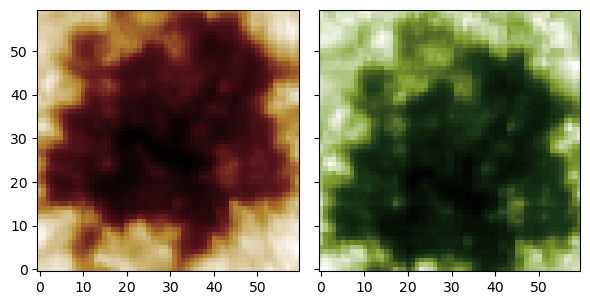

In [19]:
import fisspy
import numpy as np
import matplotlib.pyplot as plt

# read the photospheric raster images for each camera
a = fisspy.read.FISS('./FISS_20140603_170841_A1_c.fts')
b = fisspy.read.FISS('./FISS_20140603_170901_B1_c.fts')
rasterA = a.getRaster(a.cwv+4)
rasterB = b.getRaster(b.cwv+4)

# show the raster images
fig, ax = plt.subplots(1,2,figsize=[6,6],sharex=True, sharey=True)
ax[0].imshow(rasterA[80:140,40:100], fisspy.cm.ha, origin='lower')
ax[1].imshow(rasterB[80:140,40:100], fisspy.cm.ca, origin='lower')
fig.tight_layout()
fig.show()

To align the data, you should match the data size of two images. We use the '[alignOffset](../)' to calculate the shift value between two images. The first input is the image to be shifted, and the second term is the reference image.

Note that if the initial shift is large enough (more than 10 pixels), it should be better to run alignOffset and shiftImage several times. Because the error of alignOffset is around 1~5 %.

/var/folders/y7/dh82mcw52jbd3db36ggmzkkm0000gn/T/ipykernel_12446/3095191101.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


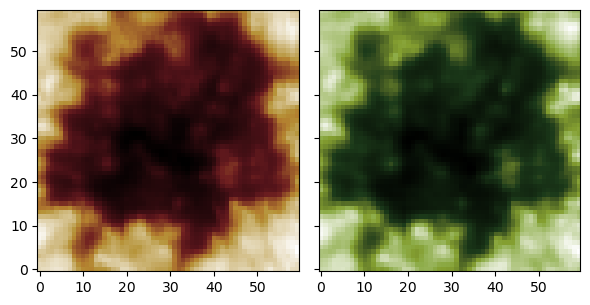

In [20]:
sh = fisspy.align.alignOffset(rasterB, rasterA[:b.ny])
srasterB = fisspy.align.shiftImage(rasterB, -sh)

fig, ax = plt.subplots(1,2,figsize=[6,6],sharex=True, sharey=True)
ax[0].imshow(rasterA[80:140,40:100], fisspy.cm.ha, origin='lower')
ax[1].imshow(srasterB[80:140,40:100], fisspy.cm.ca, origin='lower')
fig.tight_layout()
fig.show()